In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/Diabetes_1.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Data is clean or not?

# check missing values
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
# check duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
# check data types of cols
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [7]:
# check descriptive summary of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# replace min values (zero) in some cols  with mean/median

l=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in l:
  df[col]=df[col].replace(0,df[col].median())

In [9]:
# check descriptive summary of the data again
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

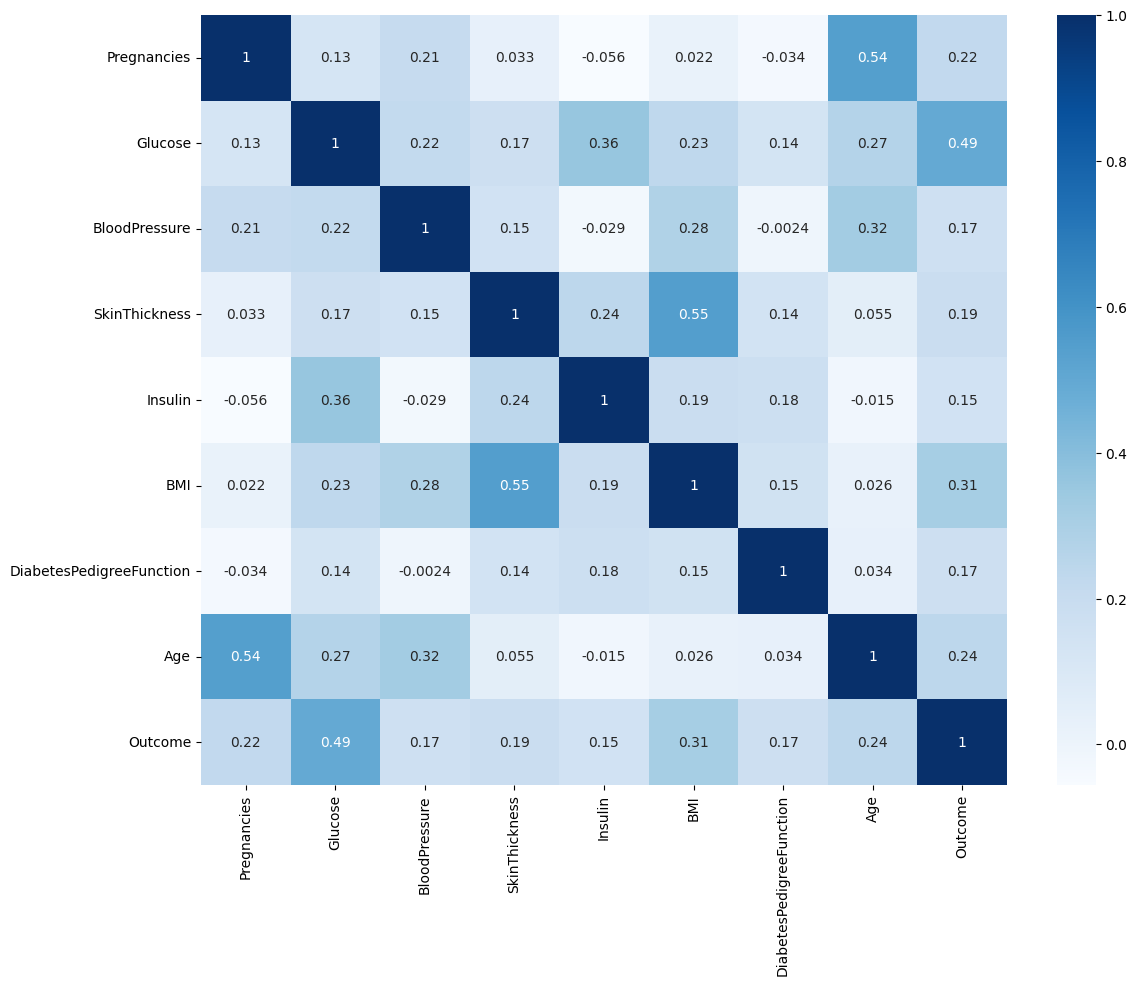

In [10]:
# data is clean

# data exploration

# heatmap
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, cmap='Blues')

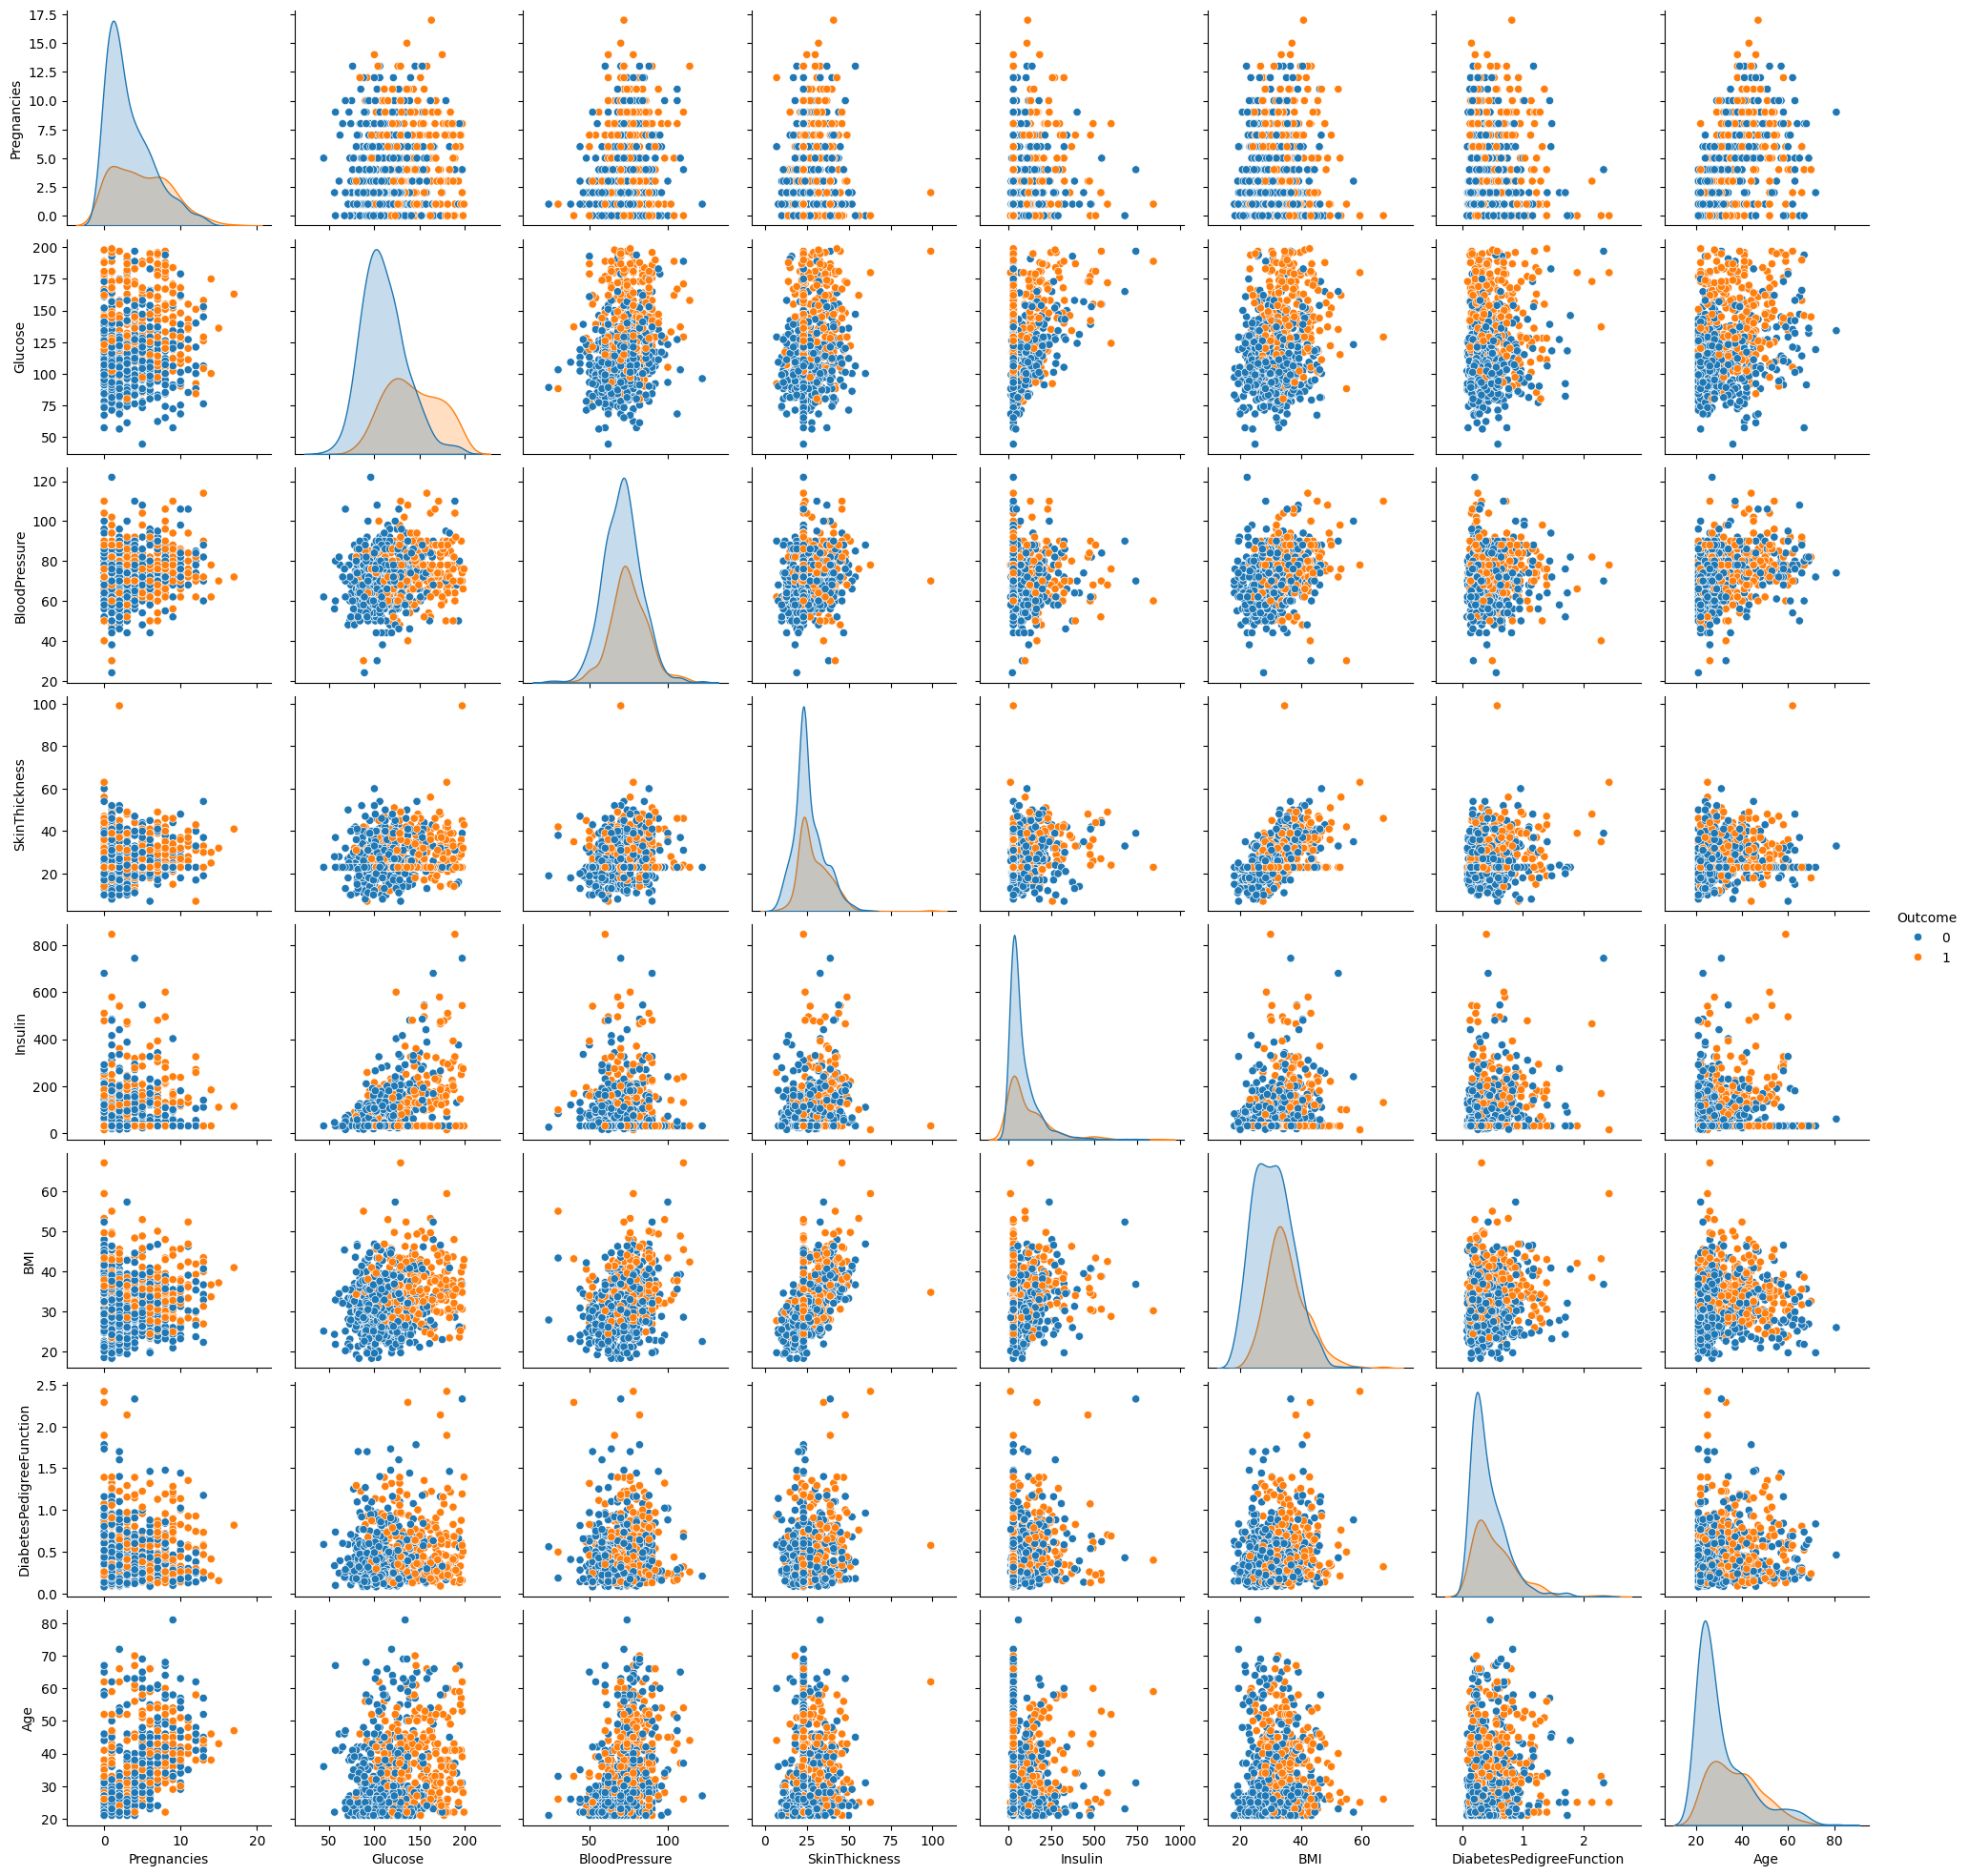

In [11]:
sns.pairplot(df,hue='Outcome')

<Axes: >

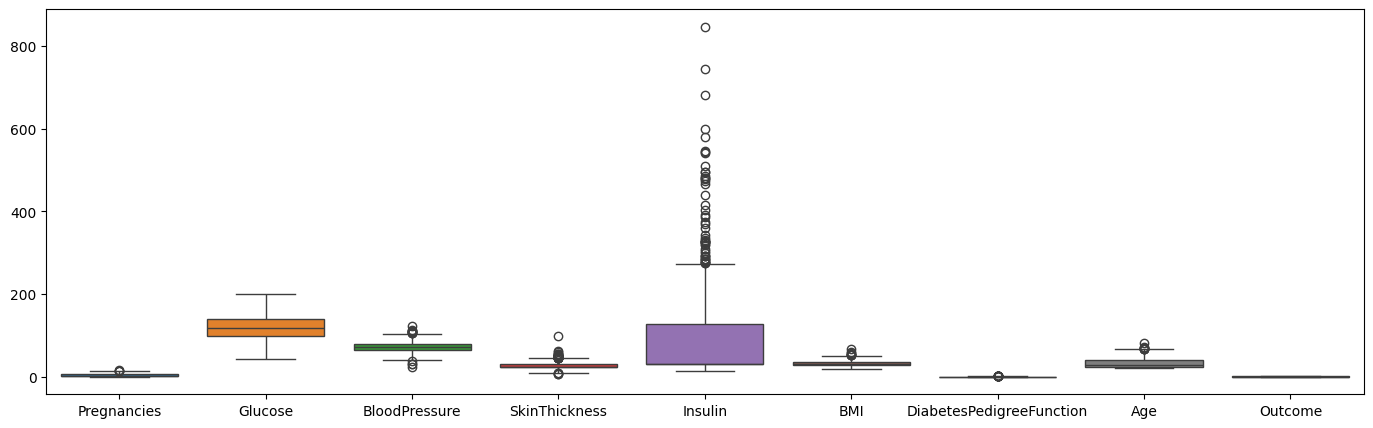

In [12]:
# to see the outliersin the data
plt.figure(figsize=(17,5))
sns.boxplot(data=df)

In [13]:
# split the data into input and target variable
X=df.drop('Outcome',axis=1) # input variables
y=df['Outcome'] # target variable

In [14]:
# split X & y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [16]:
# import the classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [17]:
# intialize the models
lrc=LogisticRegression()
knnc=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gnbc=GaussianNB()

In [18]:
# train the models
lrc.fit(X_train,y_train)
knnc.fit(X_train,y_train)
dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train)
gnbc.fit(X_train,y_train)

GaussianNB()

In [19]:
# test each model on the test set
lrc_pred=lrc.predict(X_test)
knnc_pred=knnc.predict(X_test)
dtc_pred=dtc.predict(X_test)
rfc_pred=rfc.predict(X_test)
gnbc_pred=gnbc.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

In [22]:
# metrics we gonna use in classification problems are different

# accuracy_score
# precision_score
# recall_score
# f1_score
# f2_score  (manual_metrics)
# f0.5_score (manual_metrics)
# confusion_matrix


In [23]:
# Confusion Matrix for LRC_Model
confusion_matrix(y_test,lrc_pred)

array([[83, 16],
       [19, 36]])

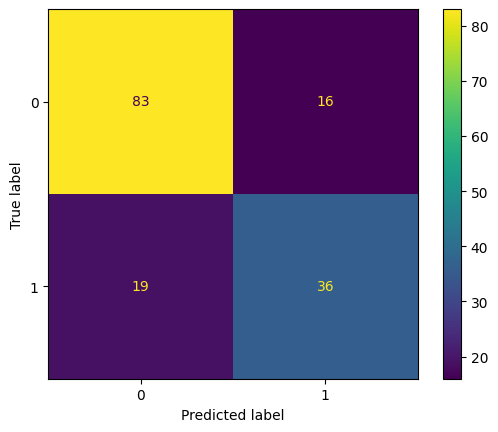

In [24]:
ConfusionMatrixDisplay(confusion_matrix(y_test,lrc_pred)).plot()
plt.show()

In [25]:
accuracy_score(y_test,lrc_pred)

0.7727272727272727

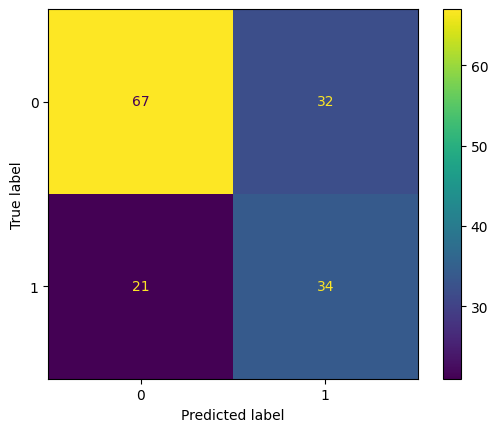

In [26]:
ConfusionMatrixDisplay(confusion_matrix(y_test,knnc_pred)).plot()
plt.show()

In [27]:
accuracy_score(y_test,knnc_pred)

0.6558441558441559

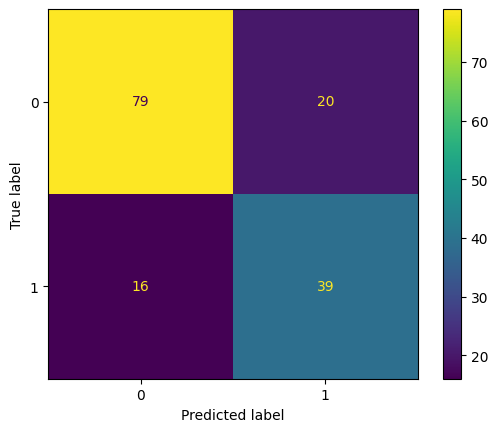

In [28]:
ConfusionMatrixDisplay(confusion_matrix(y_test,rfc_pred)).plot()
plt.show()

In [29]:
accuracy_score(y_test,rfc_pred)

0.7662337662337663

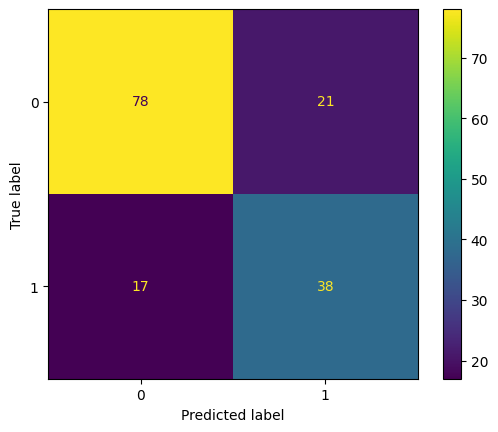

In [30]:
ConfusionMatrixDisplay(confusion_matrix(y_test,gnbc_pred)).plot()

In [31]:
accuracy_score(y_test,gnbc_pred)

0.7532467532467533

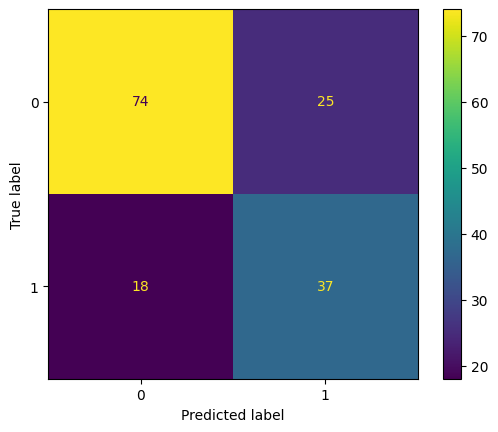

0.7207792207792207


In [32]:
ConfusionMatrixDisplay(confusion_matrix(y_test,dtc_pred)).plot()
plt.show()

print(accuracy_score(y_test,dtc_pred))

In [33]:
# acc_score=Tp +Tn / Tp+Tn+Fp+Fp
# precision_score=Tp / Tp+FP
# recall_score=Tp / Tp+FN
# f1_score=2*precision_score*recall_score / (precision_score+recall_score)

In [34]:
print(recall_score(y_test,lrc_pred))
print(recall_score(y_test,knnc_pred))
print(recall_score(y_test,rfc_pred))
print(recall_score(y_test,gnbc_pred))
print(recall_score(y_test,dtc_pred))

0.6545454545454545
0.6181818181818182
0.7090909090909091
0.6909090909090909
0.6727272727272727


In [35]:
print(precision_score(y_test,rfc_pred))
print(precision_score(y_test,gnbc_pred))
print(precision_score(y_test,dtc_pred))

0.6610169491525424
0.6440677966101694
0.5967741935483871


In [36]:
# choose rfc_model as my best model for this dataset dataset
import pickle
pickle.dump(rfc,open('model_diab_rfc.pkl','wb'))

A model was tested on 50 patients to predict whether they have Diabetes (Positive) or No Diabetes (Negative).
Out of 25 patients who actually had Diabetes, the model correctly predicted 20 of them.
Out of 25 patients who did not have Diabetes, the model correctly predicted 18 of them.

A spam detection model was tested on 100 emails.
The model predicted 30 emails as spam, out of which 25 were actually spam.
Out of 70 emails predicted as not spam, 60 were actually not spam.